On va commencer par installer un serveur neo4j

In [1]:
!apt-get install openjdk-17-jdk-headless -qq
!wget -O neo4j-community.tar.gz 'https://neo4j.com/artifact.php?name=neo4j-community-5.5.0-unix.tar.gz'
!tar -xf neo4j-community.tar.gz
!neo4j-community-5.5.0/bin/neo4j-admin dbms set-initial-password yourpassword
!neo4j-community-5.5.0/bin/neo4j start
!pip install py2neo

Selecting previously unselected package openjdk-17-jre-headless:amd64.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../openjdk-17-jre-headless_17.0.16+8~us1-0ubuntu1~22.04.1_amd64.deb ...
Unpacking openjdk-17-jre-headless:amd64 (17.0.16+8~us1-0ubuntu1~22.04.1) ...
Selecting previously unselected package openjdk-17-jdk-headless:amd64.
Preparing to unpack .../openjdk-17-jdk-headless_17.0.16+8~us1-0ubuntu1~22.04.1_amd64.deb ...
Unpacking openjdk-17-jdk-headless:amd64 (17.0.16+8~us1-0ubuntu1~22.04.1) ...
Setting up openjdk-17-jre-headless:amd64 (17.0.16+8~us1-0ubuntu1~22.04.1) ...
update-alternatives: using /usr/lib/jvm/java-17-openjdk-amd64/bin/java to provide /usr/bin/java (java) in auto mode
update-alternatives: using /usr/lib/jvm/java-17-openjdk-amd64/bin/jpackage to provide /usr/bin/jpackage (jpackage) in auto mode
update-alternatives: using /usr/lib/jvm/java-17-openjdk-amd64/bin/keytool to provide /usr/bin/keytool (keytool) in auto mod

Petit test

In [14]:
from py2neo import Graph
graph = Graph("bolt://localhost:7687", auth=("neo4j", "yourpassword"))
graph.run("MATCH (n) DETACH DELETE n")
result = graph.run("MATCH (n) RETURN n LIMIT 5").data()
print(result)

[]


In [15]:
graph.run("CREATE (a:Person {name: 'Alice'})")
graph.run("CREATE (b:Person {name: 'Bob'})")
graph.run("CREATE (b:Person {name: 'Bill'})")
graph.run("MATCH (a:Person {name: 'Alice'}), (b:Person {name: 'Bob'}) CREATE (a)-[:FRIEND]->(b)")
graph.run("MATCH (a:Person {name: 'Alice'}), (b:Person {name: 'Bill'}) CREATE (a)-[:FRIEND]->(b)")


(No data)

In [16]:
query = """
MATCH (a:Person)-[r:FRIEND]->(b:Person)
RETURN a.name AS from, b.name AS to
"""
edges = graph.run(query).data()
print(edges)


[{'from': 'Alice', 'to': 'Bob'}, {'from': 'Alice', 'to': 'Bill'}]


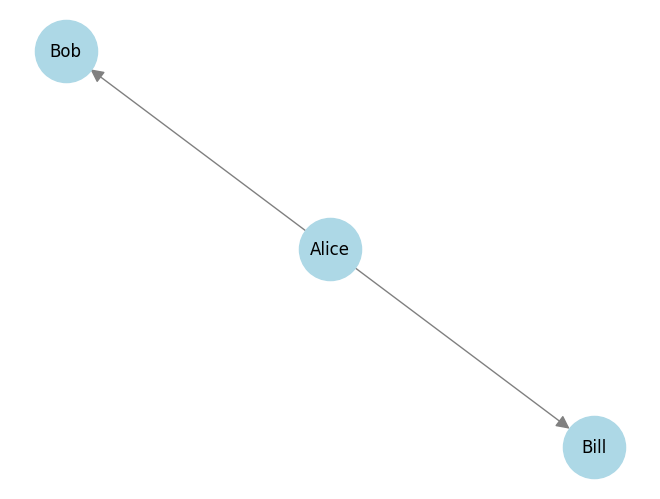

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for edge in edges:
    G.add_edge(edge['from'], edge['to'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, arrowsize=20)
plt.show()
